In [1]:
# TODO: learn what spectral clustering is

In [70]:
import sys
# not best practice, but makes it easier to import from subdirectory
sys.path.insert(0, './lib')

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
import hdbscan
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from importlib import reload

from sklearn.cluster import SpectralClustering
import numpy as np

import utils
import lvutils as lv
import mattplotlib as m
import matth as math

def redo():
    reload(utils)
    reload(lv)
    reload(m)
    reload(math)

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [71]:
data = utils.load_data('ki_0126_V2_py.mat')
# load the saved out latents
model = utils.load_model('model1.pickle')
R = utils.construct_R_matrix(data)
Z = utils.construct_Z_matrix(R, model, num_latents=3)
Z.shape # trials X time X latents

../../data/hn/ ki_0126_V2_py.mat
Loaded ki_0126_V2_py.mat
190541 frames, 26 units, 870 trials with 192 frames each


(870, 200, 3)

# spectral clustering

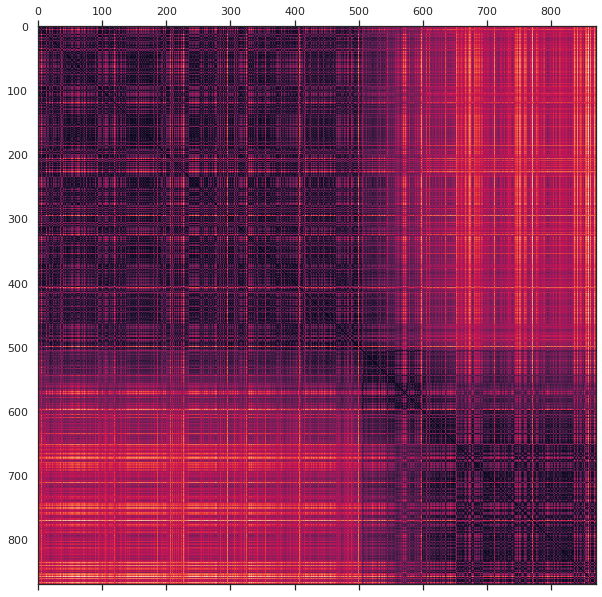

In [72]:
# average over trials and time
trialZs = np.mean(Z, axis=1)
timeZs = np.mean(Z, axis=0)

# need to compute square distance matrix first before you can do this part
# do this with Euclidian distance
# add 1 to prevent a divide by zero
trial_distances = np.array([[np.linalg.norm(a-b)+1 for b in trialZs] for a in trialZs])

plt.matshow(trial_distances)

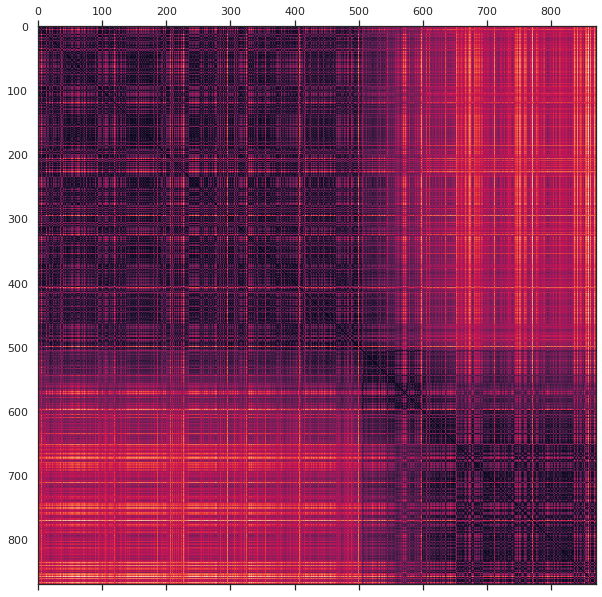

In [73]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
clustering = SpectralClustering(n_clusters=3,
                                affinity='precomputed') # have it work over my distances
clustering.fit(trial_distances)
plt.matshow(clustering.affinity_matrix_)

(array([868.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

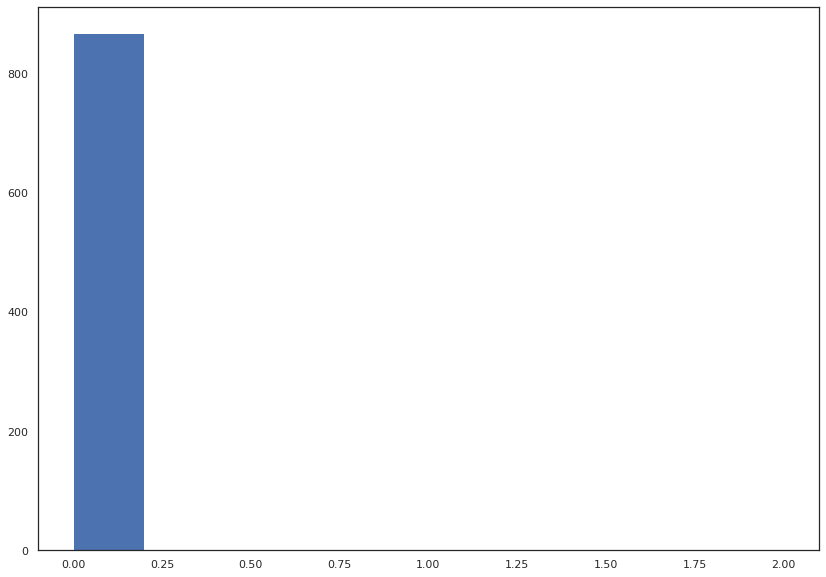

In [74]:
plt.hist(clustering.labels_)
# TODO: figure out why I can't get spectral clustering to work,
#       whether I use the built-in affinity matrix or my own

# HDBSCAN clustering

In [62]:
# https://stackoverflow.com/questions/32930647/spectral-clustering-and-multi-dimensional-scaling-in-python
# this is a good clustering algorithm
# hierarchical density-based clustering, good for clusters of similar density
# https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=10,
).fit_predict(trialZs)

labels.shape

(870,)

/tmp/ipykernel_28902/2632054099.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


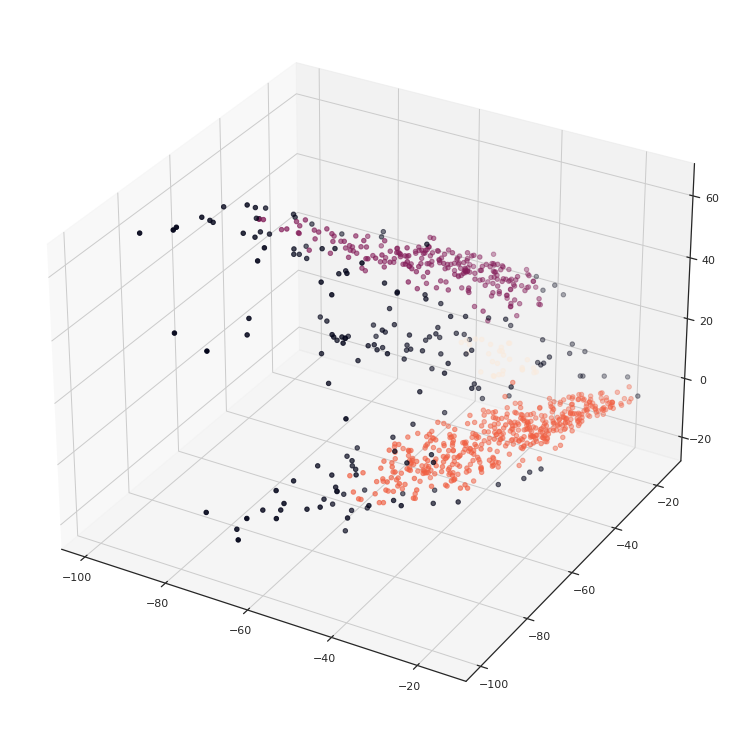

In [63]:
# plot the HDBSCAN calculated clusters (over trials) on the 3D plot (averaged over trials)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(np.mean(Z, axis=1).T[0],
           np.mean(Z, axis=1).T[1],
           np.mean(Z, axis=1).T[2],
           c=labels)
plt.show()

In [78]:
redo()
utils.enpickle(labels, 'arm_labels_hdbscan.pickle')

# SCRATCH

In [43]:
np.mean(Z, axis=0)

array([[  -7.32428697,   -3.46062532,    0.39565863],
       [  -8.32627344,   -2.74733144,    1.14321263],
       [  -7.71246189,   -3.03659764,    0.66096242],
       [  -9.50843027,   -5.86614637,    2.31244117],
       [ -54.03255461,  -63.61794476,   39.50036943],
       [-168.69996433, -157.00042795,   44.09152915],
       [-139.01513637, -122.3761173 ,   14.60092059],
       [ -96.40913076,  -90.77722149,   10.74362348],
       [-105.58324402,  -95.65285114,   13.25825233],
       [ -98.59523873,  -80.64143957,    8.08543215],
       [ -87.34329322,  -69.33383775,   11.82076396],
       [ -79.43396888,  -60.97587763,   14.23812544],
       [ -72.17870082,  -55.40917055,   17.01828295],
       [ -66.66206877,  -52.43543666,   19.00507907],
       [ -65.478993  ,  -54.08635305,   19.50813849],
       [ -69.44139015,  -59.17886584,   18.32666714],
       [ -70.06399678,  -60.20448193,   15.08264833],
       [ -74.53060854,  -62.68407735,   14.54676524],
       [ -74.78022744,  -65.